# Projekt 1 - Kategoryzacja płci głosu
## Maciej Chylak i Maciej Gryszkiewicz

# 1. EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import requests
import pickle

In [2]:
df=requests.get("https://api.apispreadsheets.com/api/dataset/gender-voice/").json()
from pandas import json_normalize 
voice_df = json_normalize(df, 'data')
voice_df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

### Objasnienie danych zawartych w ramce
- meanfreq - srednia czestotliwosc (w kHz)
- sd       - odchylenie standardowe
- median     - mediana czestotliwosci (w kHz)
- Q25     - pierwszy kwantyl czestotliwosci (w kHz)
- Q75     - trzeci kwantyl (w kHz)
- IQR     - Rozstep cwiartkowy (w kHz)
- skew     - skosnosc
- kurt     - kurtoza
- sp.ent     - entropia spektrum - mierzy nieregularnosc sygnalu
- sfm     - plaskosc spektrum - pokazuje jak bardzo sygnal jest plaski w opozycji do bycia szumem
- mode     - moda czestotliwosci
- centroid - wskazuje centrum masy spektrum
- meanfun     - srednia czestotliwosci tonu podstawowego - najnizszego tonu - dzwieku szeregu harmonicznego
- minfun     - minimum czestotliwosci tonu podstawowego
- maxfun     - maksimum czestotliwosci tonu podstawowego
- meandom     - srednia czestotliwosci z najwieksza ampliduda
- mindom     - minimum czestotliwosci z najwieksza ampliduda
- maxdom     - maksimum czestotliwosci z najwieksza ampliduda
- dfrange     - zasieg najwiekszej amplitudy tonu podstawowego
- modindx     - wskaznik dewiacji czestotliwosci - iloczyn czestotliwosci sygnalu nosnego do dewiacji czestotliwosci

In [3]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

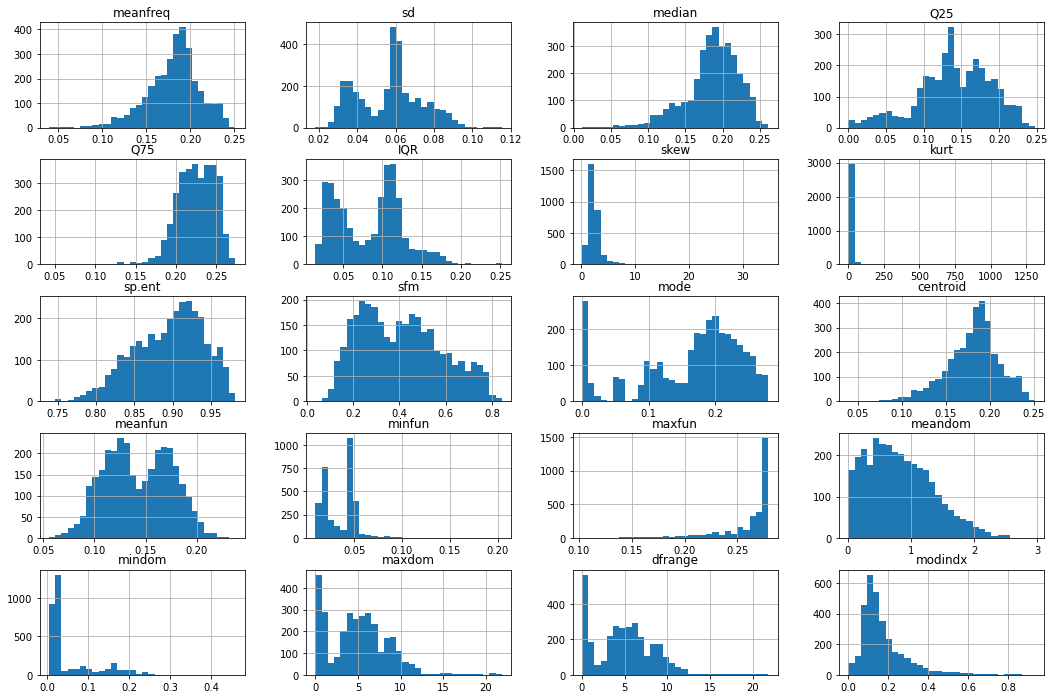

In [4]:
voice_df.hist(figsize=(18, 12), bins=30);
plt.show()

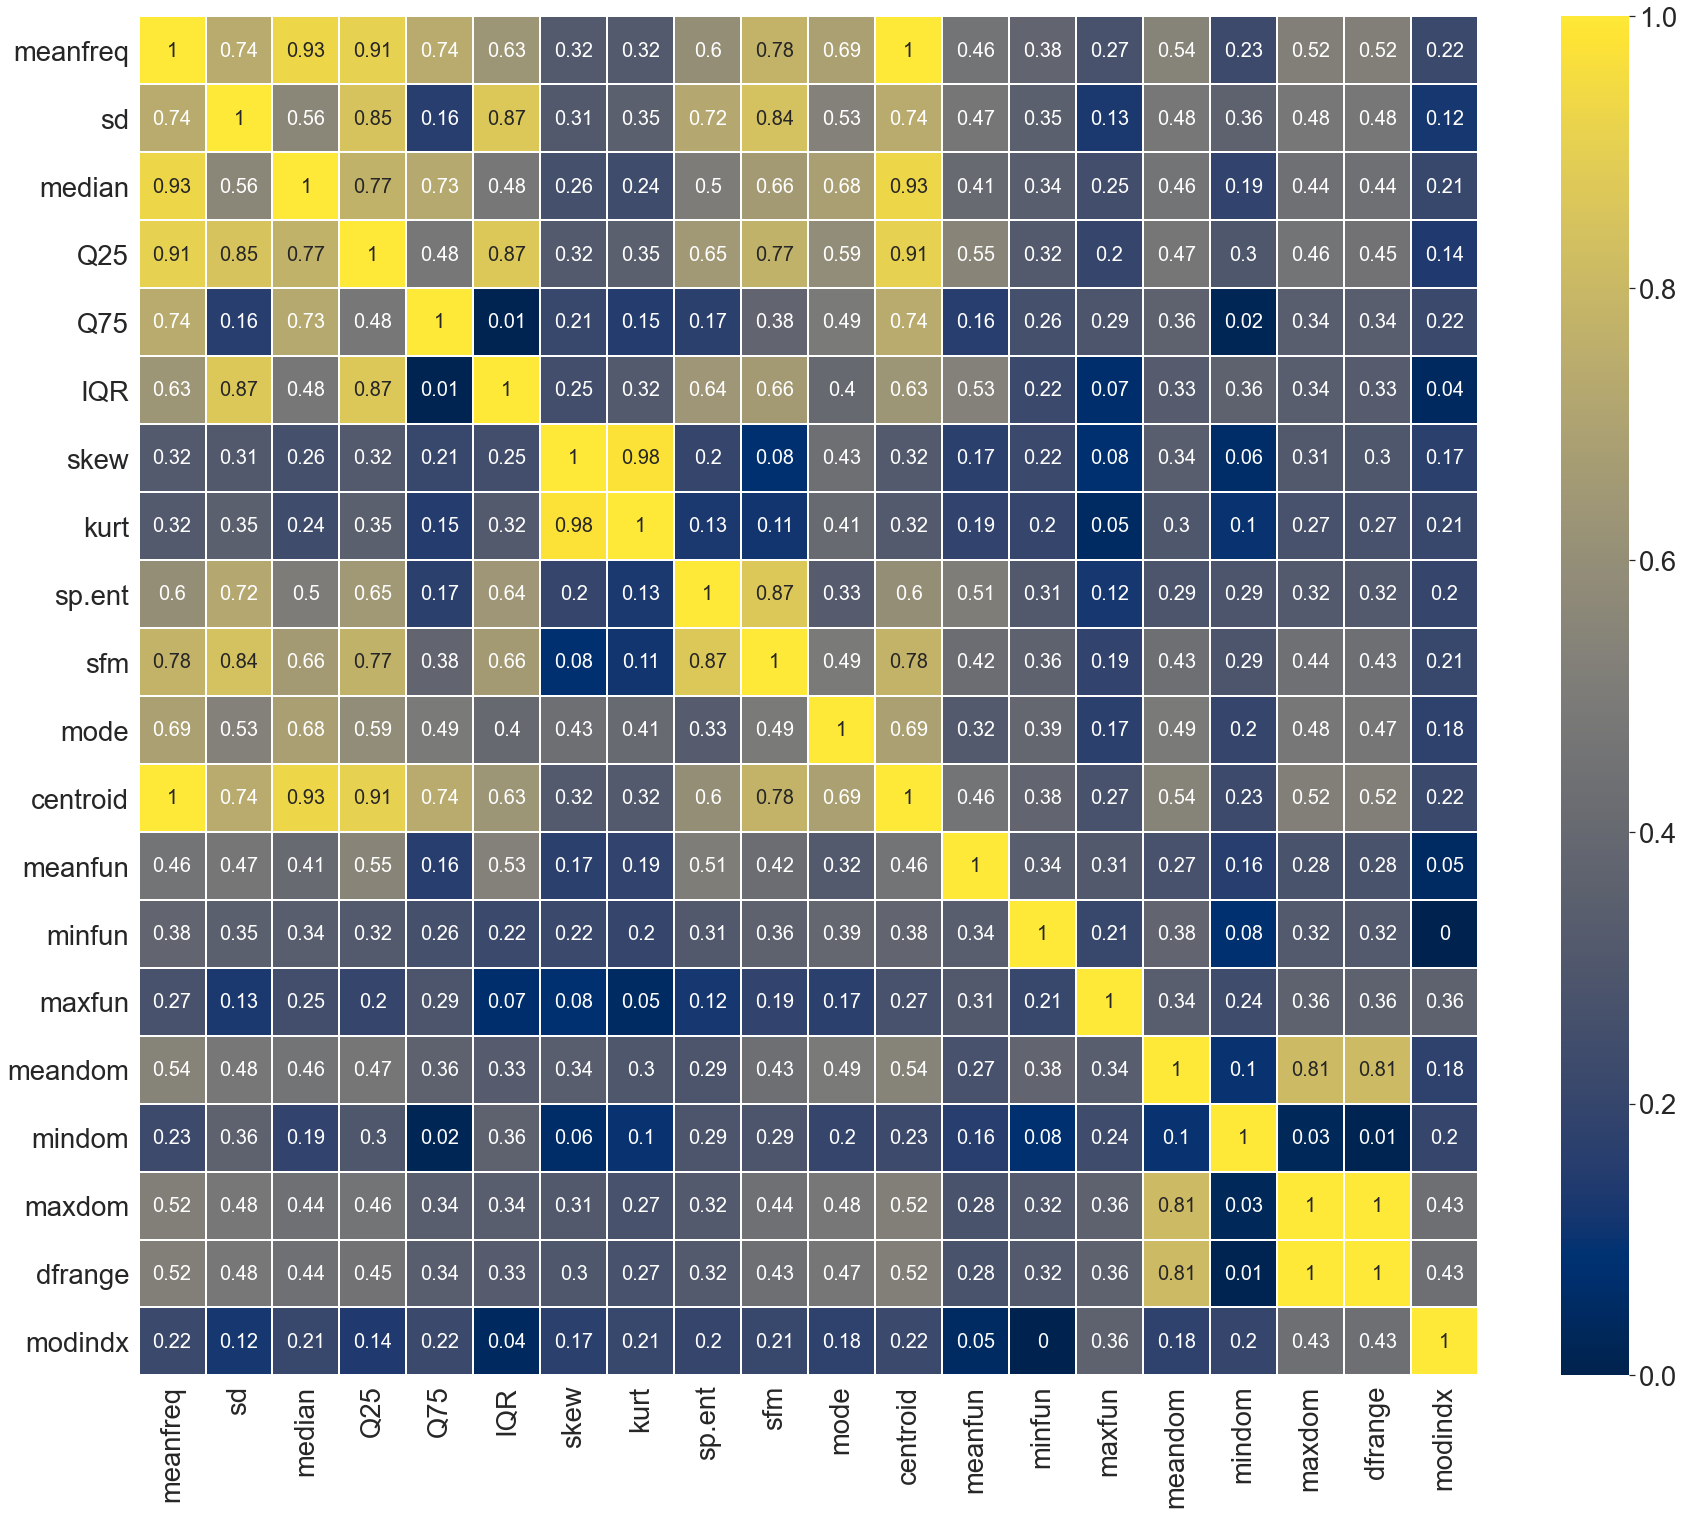

In [5]:
sns.set(font_scale=2.5)
fig, ax = plt.subplots(figsize = (30, 25))
sns.heatmap(round(abs(voice_df.corr()), 2), cmap="cividis", annot = True, vmin=0, vmax=1, linewidths=1, linecolor='white', annot_kws={"fontsize":20});
plt.show()
sns.set(font_scale=1)

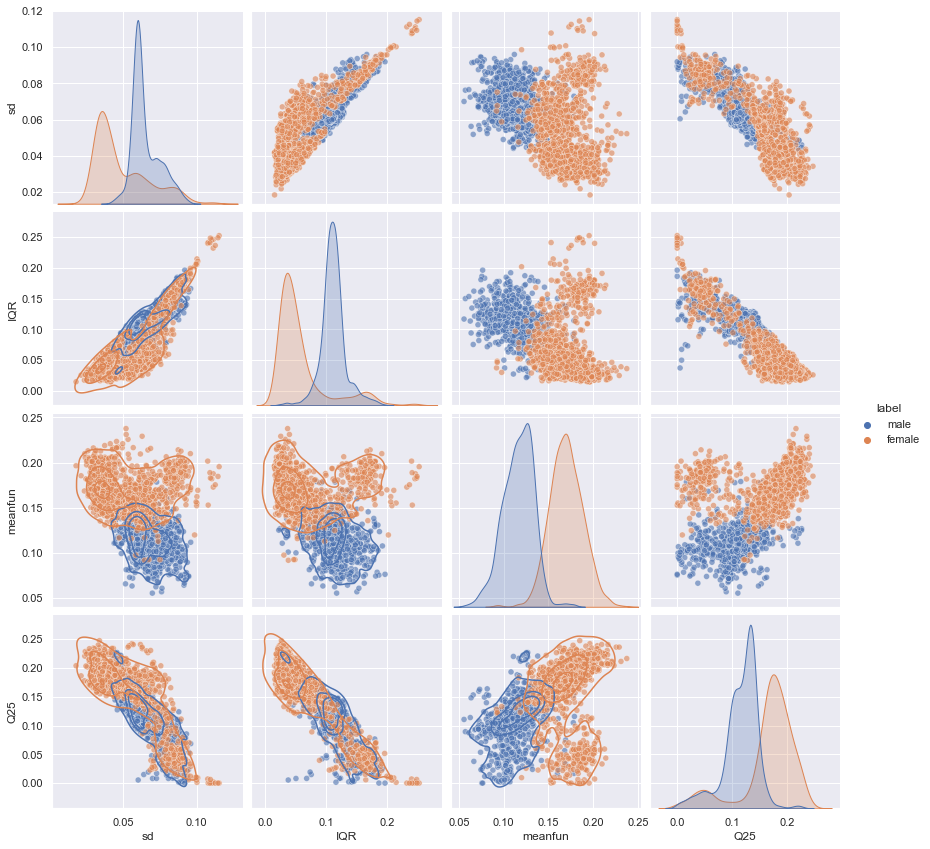

In [6]:
g = sns.pairplot(voice_df[['sd', 'IQR', 'meanfun', 'Q25', 'label']], hue = 'label', height = 3,  plot_kws = {'alpha': 0.6})
g.map_lower(sns.kdeplot, levels=4, color=".2");
plt.show()

In [7]:
def ridgeplot(voice_df, label1):
    rp = sns.FacetGrid(voice_df, row="label", hue="label", aspect=5, height=1.25) 
    rp.map(sns.kdeplot, label1, bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    rp.map(sns.kdeplot, label1, clip_on=False, color="w", lw=2, bw_adjust=.5)
    rp.map(plt.axhline, y=0, lw=2, clip_on=False)
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)
    rp.map(label, label1)
    rp.set_titles("")
    rp.despine(bottom=True, left=True)
    rp.fig.tight_layout()
    
cols = voice_df.columns.values[0:18].tolist

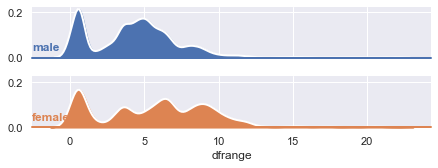

In [8]:
ridgeplot(voice_df, "dfrange")
plt.show()

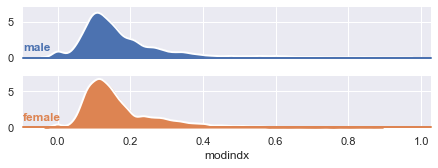

In [9]:
ridgeplot(voice_df, "modindx")
plt.show()

##### Jak widac zmienne te sa niemalże identyczne dla glosu żeńskiego jak i dla glosu meskiego. Oznacza to, że w przyszlosci bedziemy mogli je pominac w naszym modelu, bez znaczacego wplywu na jego zdolnosci predykcyjne.

# 2. Preprocessing

## Wczytanie odpowiednich bibliotek, wczytanie ramki danych

In [10]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

warnings.filterwarnings("ignore")

## Pozbycie się kolumn które są w pełni zależne od innych kolumn (patrz EDA)

In [11]:
voice_df = voice_df.drop(columns=["centroid", "kurt", "dfrange"], axis=1)

In [12]:
voice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   sp.ent    3168 non-null   float64
 8   sfm       3168 non-null   float64
 9   mode      3168 non-null   float64
 10  meanfun   3168 non-null   float64
 11  minfun    3168 non-null   float64
 12  maxfun    3168 non-null   float64
 13  meandom   3168 non-null   float64
 14  mindom    3168 non-null   float64
 15  maxdom    3168 non-null   float64
 16  modindx   3168 non-null   float64
 17  label     3168 non-null   object 
dtypes: float64(17), object(1)
memory usage: 445.6+ KB


## Narysujmy rozkłady pozostałych kolumn

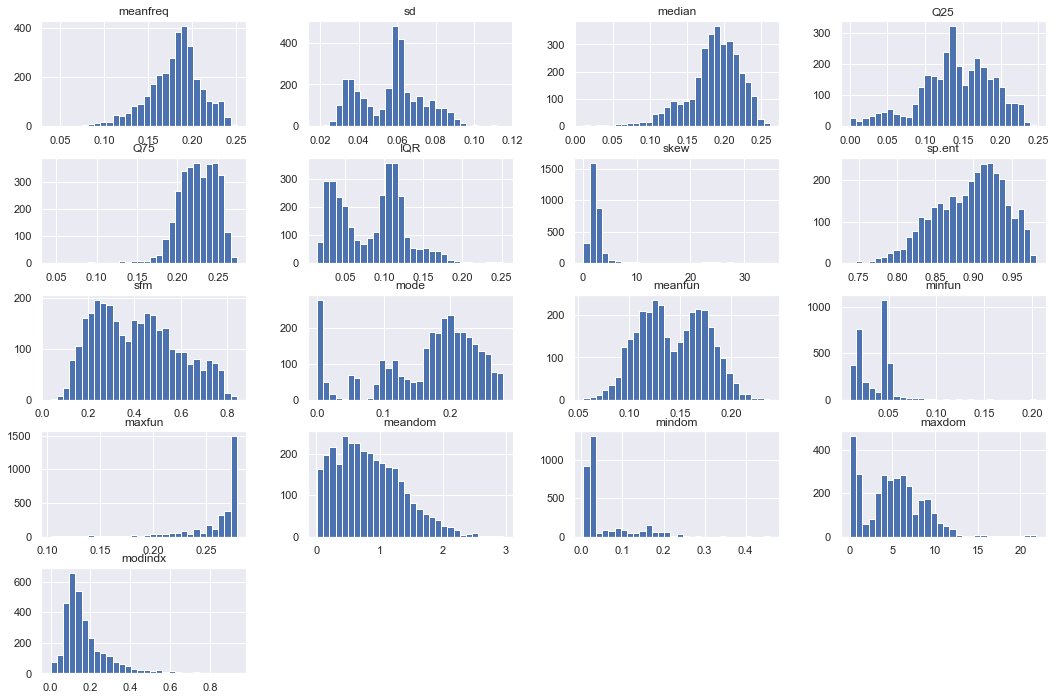

In [13]:
voice_df.hist(figsize=(18, 12), bins=30);
plt.show()

<Figure size 432x288 with 0 Axes>

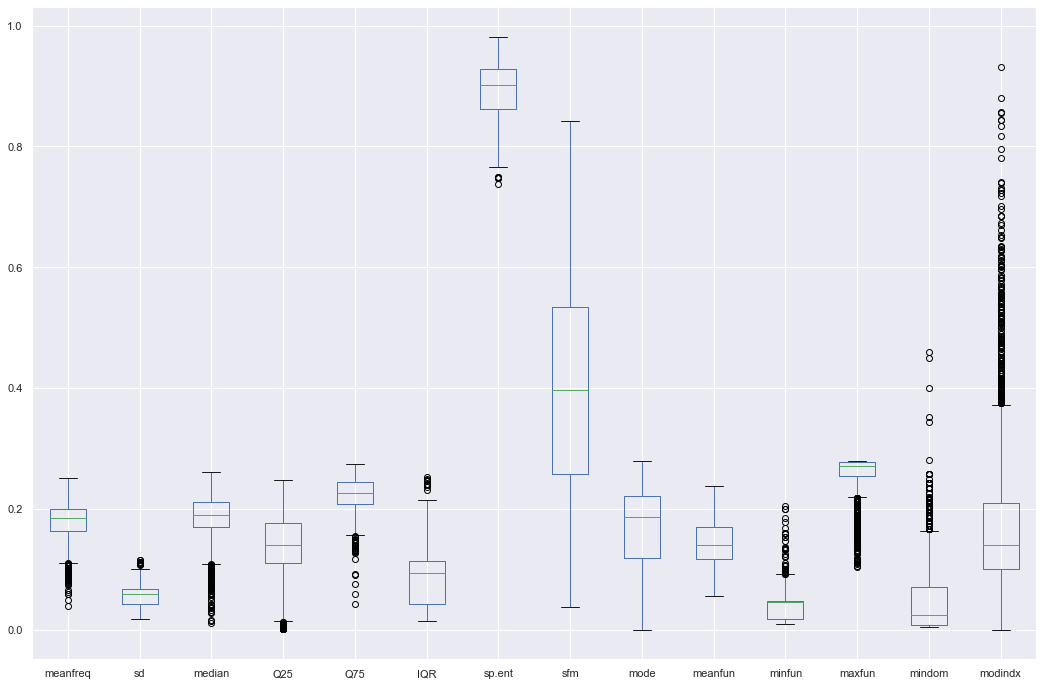

<Figure size 432x288 with 0 Axes>

In [14]:
voice_df.drop(columns=["skew", "meandom", "maxdom"], axis=1).plot(figsize=(18, 12), kind='box')
plt.figure()

<Figure size 432x288 with 0 Axes>

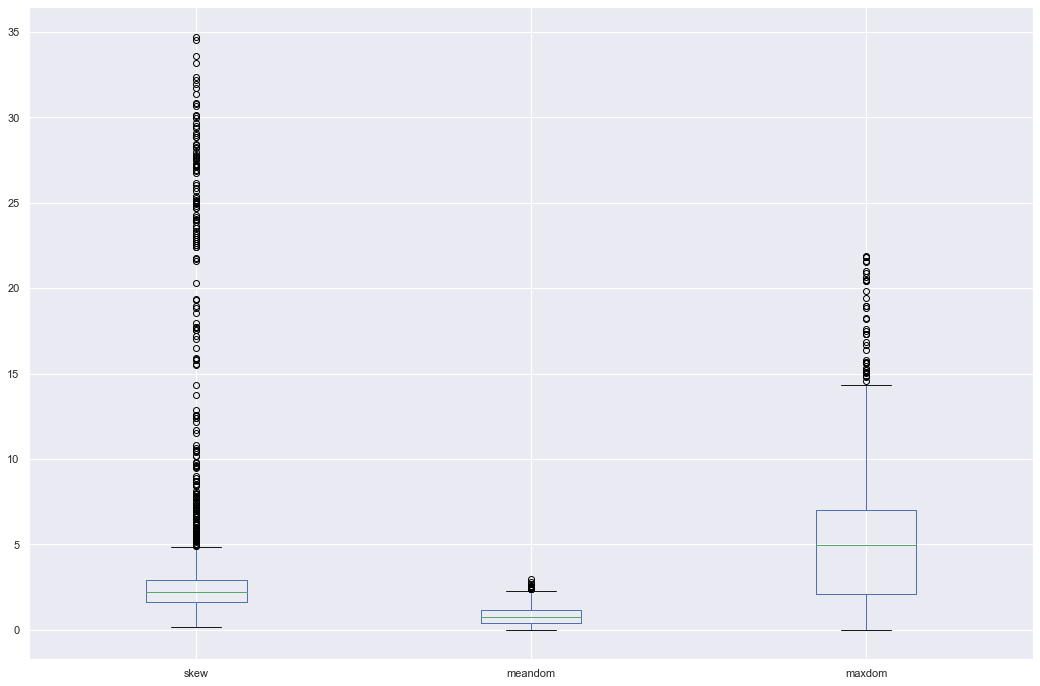

<Figure size 432x288 with 0 Axes>

In [15]:
voice_df[["skew", "meandom", "maxdom"]].plot(figsize=(18, 12), kind='box')
plt.figure()

### Przyjrzyjmy się kolumnie mindom. Mindom oznacza dokładnie minimal dominant frequency w trakcie trwanie dzwięku. Zauważmy, że większość z tych wartości jest zbliżona do zera. Odpowiada to dokładnie sytuacji, w której przez mikrofon nic nie mówiono. Jest to najprawdopodobniej charakterystyka otoczenia, co można zauważyć chociażby po następujących po sobie wierszach, w których wartości te są zbliżone do siebie. Z tego względu postanowiliśmy nie uwzględniać tej kolumny w dalszym budowaniu modelu

In [16]:
voice_df = voice_df.drop(columns=["mindom"], axis=1)

## Zauważmy, że kolumna skew, modindx są prawoskośne, a maxfun lewoskośny. Dokonajmy odpowiednich transformacji

In [17]:
voice_df["skew"] = np.log1p(voice_df["skew"])
voice_df["modindx"] = np.log1p(voice_df["modindx"])

voice_df["maxfun"] = voice_df["maxfun"]**3

## Sprawdźmy, czy któryś z naszych rozkładów jest zbliżony do rozkładu normalnego

In [18]:
from scipy import stats

alpha =  0.05
cols = voice_df.columns.values
cols = cols[0:20]
cols_test = []
for col in cols:
    k2, p = stats.normaltest(voice_df.minfun)
    
    if p < alpha: 
        cols_test.append(0)
    else:
        cols_test.append(1)
print(cols_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Jak możemy zauważyć żadna z naszych zmiennych nie posiada rozkładu normalnego. Nie będziemy więc mogli się posłużyć metodami pozbywania się outlierów przeznaczonych dla rozkładów normalnych

### Przyjrzyjmy się kolumnie mode. Określa ona częstotliwość modalną. Zauważmy, że w bardzo wielu próbkach częstotliwość modalna wynosi zero, a co za tym idzie największą część częstotliwości głosu stanowiły momenty ciszy. Jednak nie zawsze oznacza to, że znacząca część nagrania stanowiła cisza. Ponieważ nie jesteśmy w stanie określić dokładnie na tak przerobionych danych ile dokładnie ona trwała, postanowiliśmy usunąć tylko i wyłącznie te wiersze, dla których Q25 wynosiło mniej niż 60Hz, gdyż to oznacza, że 25% czasu stanowiła cisza. 60Hz, gdyż głos męski zaczyna swoje częstotliwości w granicach 85Hz, także dodaliśmy jeszcze pewien gap, aby nie wyrzucić zbyt wiele wierszy

In [19]:
voice_df = voice_df[voice_df["Q25"] > 0.060]

In [20]:
voice_df

meanfreq        sd    median       Q25       Q75       IQR      skew  \
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374  0.803270   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325  0.742496   
5     0.132786  0.079557  0.119090  0.067958  0.209592  0.141634  1.075877   
6     0.150762  0.074463  0.160106  0.092899  0.205718  0.112819  0.928474   
7     0.160514  0.076767  0.144337  0.110532  0.231962  0.121430  0.874283   
...        ...       ...       ...       ...       ...       ...       ...   
3157  0.203627  0.041529  0.204104  0.175661  0.239122  0.063461  0.901369   
3158  0.183667  0.040607  0.182534  0.156480  0.207646  0.051166  1.116497   
3159  0.168794  0.085842  0.188980  0.095558  0.240229  0.144671  0.901075   
3161  0.170656  0.081237  0.184277  0.113012  0.239096  0.126084  0.866367   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756  0.995113   

        sp.ent       sfm      mode   meanfun    minfun    maxfun   meandom  \
3     0.963322  0.727232  0.083878  0.088965  0.017798  0.015625  0.201497   
4     0.971955  0.783568  0.104261  0.106398  0.016931  0.018963  0.712812   
5     0.963181  0.738307  0.112555  0.110132  0.017112  0.016381  0.298222   
6     0.967573  0.762638  0.086197  0.105945  0.026230  0.018963  0.479620   
7     0.959255  0.719858  0.128324  0.093052  0.017758  0.002995  0.301339   
...        ...       ...       ...       ...       ...       ...       ...   
3157  0.903458  0.246953  0.208821  0.146783  0.020566  0.018046  0.875558   
3158  0.898138  0.313925  0.177040  0.149237  0.018648  0.018046  0.550312   
3159  0.956201  0.706861  0.184442  0.182863  0.020699  0.019944  0.988281   
3161  0.950750  0.658558  0.161506  0.198475  0.160000  0.016381  0.414062   
3167  0.938829  0.601529  0.267702  0.185607  0.062257  0.019944  0.227022   

        maxdom   modindx   label  
3     0.562500  0.220836    male  
4     5.484375  0.189193    male  
5     2.726562  0.117925    male  
6     5.312500  0.116887    male  
7     0.539062  0.249931    male  
...        ...       ...     ...  
3157  6.898438  0.135870  female  
3158  3.421875  0.154011  female  
3159  5.882812  0.237927  female  
3161  0.734375  0.290367  female  
3167  0.554688  0.300105  female  

[2915 rows x 17 columns]

Liczba wiersz spada nam więc z 3168 do 2915. Usuneliśmy 253 wiersze co stanowi ok. 8% danych początkowych.

In [21]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
voice_df["label"] = encoder.fit_transform(voice_df[["label"]])

In [22]:
X = voice_df.drop(["label"], axis = 1)
y = voice_df[["label"]]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

pd.DataFrame.to_csv(voice_df, "voice_preprocessed.csv", index=False)

# 3. Wybór modelu

### Dokładność modeli porównywaliśmy na podstawie Accuracy oraz Area under curve. Zdecydowaliśmy się na wybranie ogólniejszej miary oceny klasyfikatora - accuracy, ponieważ nie interesuję nas tak naprawdę rozróżnienie FP od FN

### Dla wszystkich modeli  (dla których miało to sens) obliczyliśmy ważność zmiennych, przedstawiliśmy przykładową klasyfikacje oraz narysowaliśmy zmienną ROC

# SVM

In [24]:
from sklearn.svm import SVC
svm = SVC(probability=True)

svm.fit(X_train, y_train)
y_hat = svm.predict(X_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["label"].tolist()[0:10]))

y:     [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
y_hat: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [25]:
score = cross_val_score(svm, X, y, scoring='accuracy', cv = 10)
np.mean(score)

0.7396259944452291

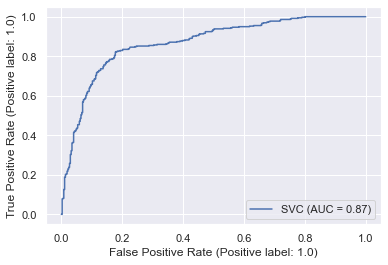

In [26]:
plot_roc_curve(svm, X_test, y_test);

In [27]:
roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

0.8676658835577242

# KNNeighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["label"].tolist()[0:10]))

y:     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
y_hat: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [29]:
score = cross_val_score(knn, X, y, scoring='accuracy', cv = 10)
np.mean(score)

0.7903532928494093

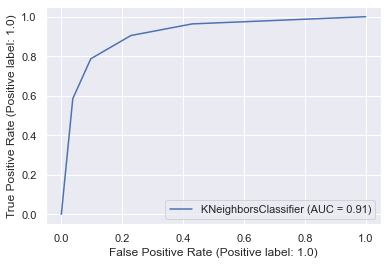

In [30]:
plot_roc_curve(knn, X_test, y_test);

In [31]:
roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])

0.9108874732688774

# Regresja logistyczna

In [32]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(max_iter=1000)

logistic_regression.fit(X_train,y_train)
y_hat = logistic_regression.predict(X_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["label"].tolist()[0:10]))

y:     [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
y_hat: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [33]:
score = cross_val_score(logistic_regression, X, y, scoring='accuracy', cv = 10)
np.mean(score)

0.91805888998729

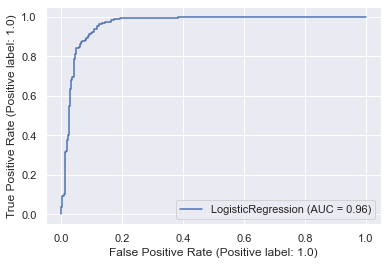

In [34]:
plot_roc_curve(logistic_regression, X_test, y_test);

In [35]:
roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:,1])

0.963231529170808

In [36]:
importance = logistic_regression.coef_[0]
importance_df = pd.DataFrame(list(zip(X.columns.values, abs(logistic_regression.coef_[0]))),
               columns =['Variable', '|Coefficient|'])
importance_df.sort_values(by = "|Coefficient|", ascending = False, ignore_index = True)

Variable  |Coefficient|
0    meanfun      12.236475
1        IQR      10.907320
2        Q25       8.200978
3     sp.ent       3.627222
4        Q75       2.706342
5         sd       2.255149
6   meanfreq       1.696228
7     median       1.627831
8    modindx       1.330811
9       skew       1.202717
10       sfm       0.707921
11    minfun       0.442919
12      mode       0.302555
13    maxfun       0.298083
14   meandom       0.119090
15    maxdom       0.053827

# Naiwny Klasyfikator Bayesowski

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)
y_hat = nb.predict(X_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["label"].tolist()[0:10]))

y:     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
y_hat: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [38]:
score = cross_val_score(nb, X, y, scoring='accuracy', cv = 10)
np.mean(score)

0.9176928870686816

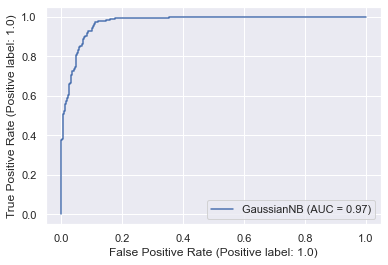

In [39]:
plot_roc_curve(nb, X_test, y_test);

In [40]:
roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])

0.9721318634980873

# Drzewo decyzyjne

In [41]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree = DecisionTreeClassifier(max_depth = 3)

tree.fit(X_train, y_train)
y_hat = tree.predict(X_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["label"].tolist()[0:10]))

y:     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]
y_hat: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [42]:
score = cross_val_score(tree, X, y, scoring='accuracy', cv = 10)
np.mean(score)

0.9540413312620627

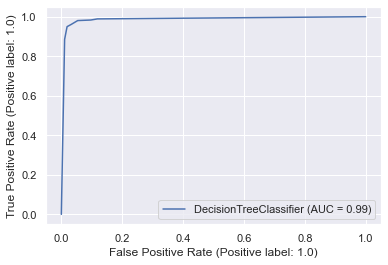

In [43]:
plot_roc_curve(tree, X_test, y_test);

In [44]:
roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])

0.9860809915363995

In [45]:
import graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_graph = export_graphviz(tree, feature_names = X.columns.values, impurity = False, class_names = ["Female", "Male"], label = "root", rounded = True)
    
graph = graphviz.Source(dot_graph)
graph.format = "jpg"
graph.render();

![](Source.gv.jpg)

In [46]:
name_list = []
importance_list = []
for name, importance in zip(X.columns, tree.feature_importances_):
    name_list.append(name)
    importance_list.append(importance)
    
importance_df = pd.DataFrame(list(zip(name_list, importance_list)),
               columns =['Variable', 'Importance'])
importance_df.sort_values(by = "Importance", ascending = False, ignore_index = True)

Variable  Importance
0    meanfun    0.903812
1        IQR    0.061445
2   meanfreq    0.022564
3        sfm    0.008250
4        Q25    0.003929
5         sd    0.000000
6     median    0.000000
7        Q75    0.000000
8       skew    0.000000
9     sp.ent    0.000000
10      mode    0.000000
11    minfun    0.000000
12    maxfun    0.000000
13   meandom    0.000000
14    maxdom    0.000000
15   modindx    0.000000

# Stackowanie (DecisionTree, NB, LogisticRegression)

In [47]:
from sklearn.ensemble import StackingClassifier

classifiers = [("DecisionTree", tree), ("NB", nb), ("LogisticRegression", logistic_regression)]

clf = StackingClassifier(estimators=classifiers, final_estimator=LogisticRegression())
clf.fit(X_train, y_train);

In [48]:
y_hat = clf.predict(X_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["label"].tolist()[0:10]))

y:     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]
y_hat: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [49]:
score = cross_val_score(clf, X, y, scoring='accuracy', cv = 10)
np.mean(score)

0.9578119851245116

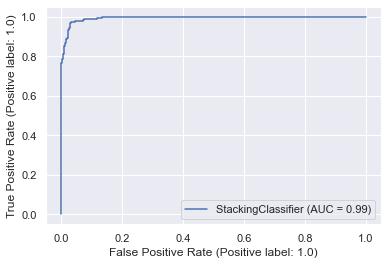

In [50]:
plot_roc_curve(clf, X_test, y_test);

In [51]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9942622210174392

# XGBoost

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=2, learning_rate=0.1, booster='gbtree', nround = 100, max_depth=4, verbosity = 0);
xgb.fit(X_train, y_train);

In [53]:
y_hat = xgb.predict(X_test)
print('y:     ' + str(y_hat[0:10].tolist()) + '\ny_hat: ' + str(y_test["label"].tolist()[0:10]))

y:     [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]
y_hat: [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]


In [54]:
score = cross_val_score(xgb, X, y, scoring='accuracy', cv = 10)
print(np.std(score))
print(np.mean(score))

0.02472103417014411
0.969486419055689


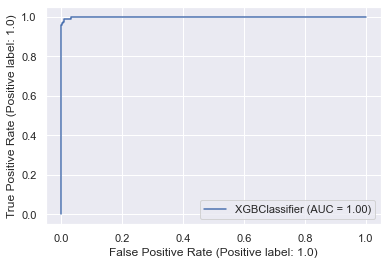

In [55]:
plot_roc_curve(xgb, X_test, y_test);

In [56]:
roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])

0.999156651908075

Jako, że XGBoost charakteryzuje się najwyższymi wynikami accuracy i ROC AUCwybieramy go jako nasz model finalny.

# 4. Strojenie modelu

Najpierw tworzymy 3 param gridy do kolejnych etapów strojenia naszego modelu. W pierwszym z nich umieściliśmy parametry min_child_weight, max_depth, n_round i n_estimators. W następnym etapie dostrajamy parametr gamma i na koniec stroimy learning_rate (eta).

In [57]:
xgb = XGBClassifier(booster='gbtree');

learning_rate = [0.01, 0.05, 0.1, 0.15, 0.3, 0.4]
gamma = [0, 0.4, 0.8, 1, 2, 5]
max_depth = [4, 5, 6]
nround = [100, 200, 400, 800]
n_estimators = [100, 200, 400, 800]
min_child_weight = [1, 2, 4, 8]


param1 = dict(min_child_weight=min_child_weight, max_depth=max_depth, nround=nround, n_estimators=n_estimators)
param2 =  dict(gamma = gamma)
param3 = dict(learning_rate = learning_rate)

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# 1
random = RandomizedSearchCV(estimator=xgb, param_distributions=param1, cv = 5, n_jobs=-1, random_state=30)

random.fit(X_train, y_train)
print("Best: %f using %s" % (random.best_score_, random.best_params_))

# 2
xgb = random.best_estimator_
random = RandomizedSearchCV(estimator=xgb, param_distributions=param2, cv = 5, n_jobs=-1, random_state=30)

random.fit(X_train, y_train)
print("Best: %f using %s" % (random.best_score_, random.best_params_))

# 3
xgb = random.best_estimator_
random = RandomizedSearchCV(estimator=xgb, param_distributions=param3, cv = 5, n_jobs=-1, random_state=30)

random.fit(X_train, y_train)

print("Best: %f using %s" % (random.best_score_, random.best_params_))

Best: 0.980790 using {'nround': 100, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5}
Best: 0.980790 using {'gamma': 0}
Best: 0.980790 using {'learning_rate': 0.3}


In [59]:
xgb = random.best_estimator_
score = cross_val_score(xgb, X, y, scoring='accuracy', cv = 10)
print(np.mean(score))
print(np.std(score))

0.9736018923880808
0.021720570857123686


In [60]:
roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])

0.9994051383994458

Jeżeli porównami wyniki dostrojonego XGBoosta do tego z 'losowymi' parametrami, okazuje się, że strojenie nieznacznie polepszyło nasz model. Accuracy wzrosło z ok. 96.9% do 97.3% odchylenie standardowe zmalało z 2.5pp do 2.2pp. Są to zmiany marginalne, ale na plus.

Ostateczny, wytrenowany model zapisujemy do pliku .pickle.

In [61]:
pickle.dump(xgb, open("xgb.pickle", "wb"))

# 5. Test modelu na własnych danych 

In [70]:
df_recorded = pd.read_csv("voice_data.csv")
df_recorded["skew"] = np.log1p(df_recorded["skew"])
df_recorded["modindx"] = np.log1p(df_recorded["modindx"])

df_recorded["maxfun"] = df_recorded["maxfun"]**3

In [72]:
xgb.predict_proba(df_recorded)

array([[0.42427415, 0.57572585],
       [0.00212216, 0.99787784]], dtype=float32)

In [73]:
df_recorded.head()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  0.201489  0.107586  0.172941  0.172941  0.259412  0.086471  2.402525   
1  0.104166  0.111340  0.086471  0.000000  0.172941  0.172941  2.301287   

     sp.ent       sfm      mode   meanfun    minfun    maxfun   meandom  \
0  0.258671  0.000036  0.172941  0.093113  0.008481  0.003177  0.180306   
1  0.258718  0.000032  0.000000  0.120350  0.005654  0.003177  0.059720   

     maxdom  modindx  
0  0.258398      0.0  
1  0.258398      0.0

In [74]:
import dalex as dx
explainer = dx.Explainer(xgb, X, y)

Preparation of a new explainer is initiated

  -> data              : 2915 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 2915 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x00000247984D7160> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.42e-06, mean = 0.503, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.981, mean = -0.000802, max = 0.992
  -> model_info        : package xgboost

A new explainer has been created!


In [75]:
ps = explainer.predict_surrogate(df_recorded.loc[[0]], type="lime")
ps.show_in_notebook()

In [80]:
ps = explainer.predict_surrogate(df_recorded.loc[[1]], type="lime")
ps.show_in_notebook()